In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [122]:
A = loadtxt('data.txt')

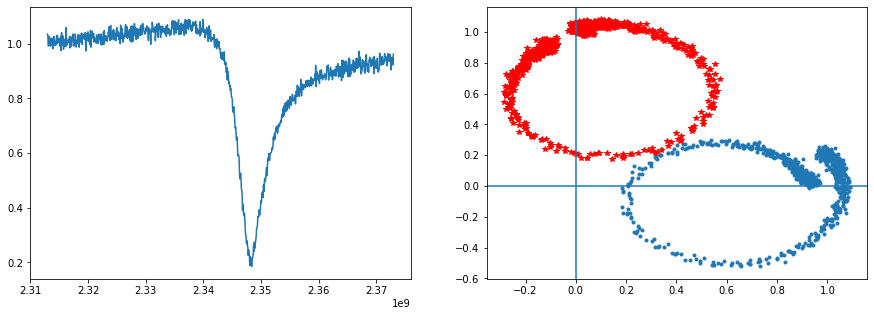

In [123]:


f = A[:,0]
baseline = A[:,1]
s = A[:,2]
phi = 2*pi*A[:,3]/360
S0 = sqrt(1e-3*10**((s)/10))
b0 = sqrt(1e-3*10**((baseline)/10))
S = S0/b0*exp(1j*phi)

fig,ax = subplots(1,2,figsize = (15,5))

ax[0].plot(f,abs(S))
ax[1].plot(real(S),imag(S),'.')

##add phase drift manually to make it look like a circle ... more phase will be added in fit function
df = 6*1e-9
S = S0/b0*exp(1j*phi)*exp(1j*( df * f))
ax[1].plot(real(S),imag(S),'r*')
axvline(0)
axhline(0)


In [124]:
#### guess parameters

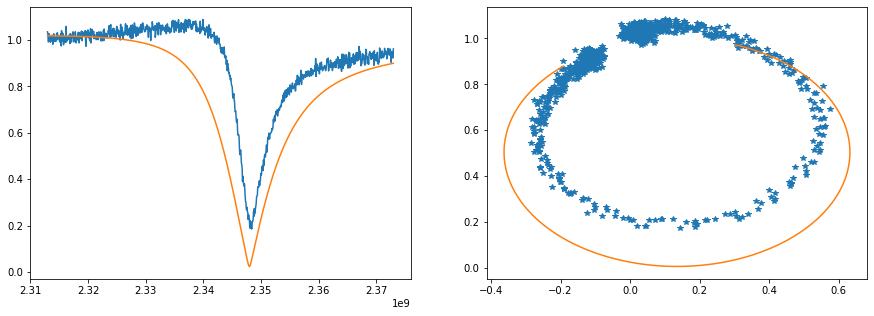

In [125]:

def fitfunctionccomplex(f,f0, kappa_c, kappa_i,phi0,phi1,df):
    delta = f-f0
    A = exp(1j*phi0)*(1-1j*kappa_c*exp(1j*phi1)/(1j*(kappa_c*exp(1j*phi1)+kappa_i)-delta))*exp(1j*( df * f))
    return r_[real(A),imag(A)]

####guess parameters
p0 = 2.348e9,8e6,200000 ,1.5,0.2,0

out = fitfunctionccomplex(f,*p0)

###this is only to shape the data cause the fit needs a 1d array 
a,b = (out.reshape((2,len(f))))
Sfit = a+1j*b


fig,ax = subplots(1,2,figsize = (15,5))

ax[0].plot(f,abs(S))
ax[0].plot(f,abs(Sfit))
df = 6*1e-9

ax[1].plot(real(S),imag(S),'*')
ax[1].plot(real(Sfit),imag(Sfit))

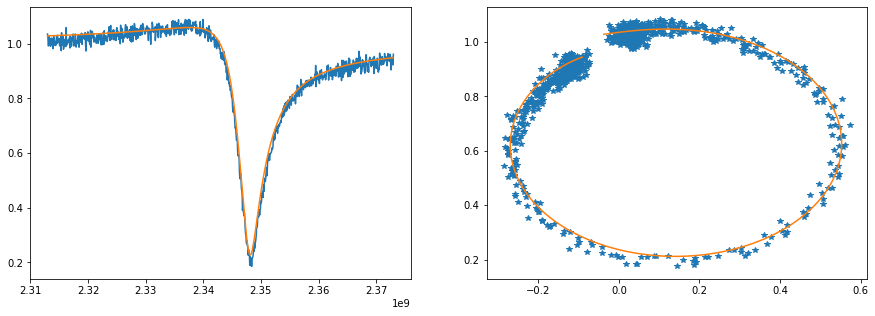

In [128]:
from scipy.optimize import curve_fit
###shape the data to be a 1d array for the curve_fit to work
Stofit = r_[real(S),imag(S)]

p,_ = curve_fit(fitfunctionccomplex,f,Stofit,p0 = p0)


out = fitfunctionccomplex(f,*p)
a,b = (out.reshape((2,len(f))))
Sfit = a+1j*b


fig,ax = subplots(1,2,figsize = (15,5))

ax[0].plot(f,abs(S))
ax[0].plot(f,abs(Sfit))
df = 6*1e-9

ax[1].plot(real(S),imag(S),'*')
ax[1].plot(real(Sfit),imag(Sfit))